In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "feature_selection/output_selection"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

df = df[(df['selection_age'].notna()) & (df['feature_selection_frac'] != 1.0)]
df

,model,sample_size,is_binary,feature_selector,feature_selection_frac,selection_age,selection_sex,selection_cp,selection_trestbps,selection_chol,selection_fbs,selection_restecg,selection_thalach,selection_exang,selection_oldpeak,selection_slope,selection_ca,selection_thal,selection_location
0,svm,0.02,True,rfe,0.4,0.08,0.36,0.68,0.10,0.04,0.18,0.38,0.06,0.50,0.56,0.48,0.60,0.48,0.50
1,svm,0.02,False,rfe,0.4,0.12,0.22,0.58,0.10,0.04,0.24,0.48,0.06,0.48,0.74,0.46,0.62,0.42,0.44
2,svm,0.02,True,rfe,0.7,0.40,0.54,0.92,0.24,0.06,0.62,0.76,0.20,0.88,0.88,0.88,0.82,0.94,0.86
3,svm,0.02,False,rfe,0.7,0.66,0.46,0.92,0.42,0.10,0.48,0.88,0.34,0.80,0.86,0.66,0.76,0.72,0.94
6,svm,0.03,True,rfe,0.4,0.00,0.52,0.64,0.00,0.00,0.48,0.50,0.00,0.62,0.66,0.36,0.32,0.42,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,logistic_regression,0.75,False,rfe,0.7,0.00,1.00,1.00,0.00,0.00,1.00,0.38,0.00,1.00,1.00,0.98,1.00,0.90,0.74
102,logistic_regression,1.00,True,rfe,0.4,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
103,logistic_regression,1.00,False,rfe,0.4,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
104,logistic_regression,1.00,True,rfe,0.7,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 105
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   72 non-null     object 
 1   sample_size             72 non-null     float64
 2   is_binary               72 non-null     bool   
 3   feature_selector        72 non-null     object 
 4   feature_selection_frac  72 non-null     float64
 5   selection_age           72 non-null     float64
 6   selection_sex           72 non-null     float64
 7   selection_cp            72 non-null     float64
 8   selection_trestbps      72 non-null     float64
 9   selection_chol          72 non-null     float64
 10  selection_fbs           72 non-null     float64
 11  selection_restecg       72 non-null     float64
 12  selection_thalach       72 non-null     float64
 13  selection_exang         72 non-null     float64
 14  selection_oldpeak       72 non-null     flo

In [4]:
df.reset_index(inplace=True)

In [5]:
pivoted = pd.wide_to_long(df, stubnames='selection', i='index', j='feature', sep='_', suffix=r'\w+')
pivoted.reset_index(inplace=True)
pivoted = pivoted.drop('index', axis=1)
pivoted

,feature,sample_size,model,feature_selector,is_binary,feature_selection_frac,selection
0,age,0.02,svm,rfe,True,0.4,0.08
1,age,0.02,svm,rfe,False,0.4,0.12
2,age,0.02,svm,rfe,True,0.7,0.40
3,age,0.02,svm,rfe,False,0.7,0.66
4,age,0.03,svm,rfe,True,0.4,0.00
...,...,...,...,...,...,...,...
1003,location,0.75,logistic_regression,rfe,False,0.7,0.74
1004,location,1.00,logistic_regression,rfe,True,0.4,0.00
1005,location,1.00,logistic_regression,rfe,False,0.4,0.00
1006,location,1.00,logistic_regression,rfe,True,0.7,1.00


In [6]:
r = pivoted['sample_size'] * 918
pivoted['sample_size'] = r
pivoted

,feature,sample_size,model,feature_selector,is_binary,feature_selection_frac,selection
0,age,18.36,svm,rfe,True,0.4,0.08
2,age,18.36,svm,rfe,True,0.7,0.40
4,age,27.54,svm,rfe,True,0.4,0.00
6,age,27.54,svm,rfe,True,0.7,0.22
8,age,45.90,svm,rfe,True,0.4,0.00
...,...,...,...,...,...,...,...
998,location,459.00,logistic_regression,rfe,True,0.7,0.90
1000,location,688.50,logistic_regression,rfe,True,0.4,0.00
1002,location,688.50,logistic_regression,rfe,True,0.7,0.88
1004,location,918.00,logistic_regression,rfe,True,0.4,0.00


In [ ]:
pivoted_binary = pivoted[pivoted['is_binary'] == True]
pivoted_binary

In [7]:
pivoted_lr = pivoted[pivoted['model'] == 'logistic_regression']
pivoted_svm = pivoted[pivoted['model'] == 'svm']

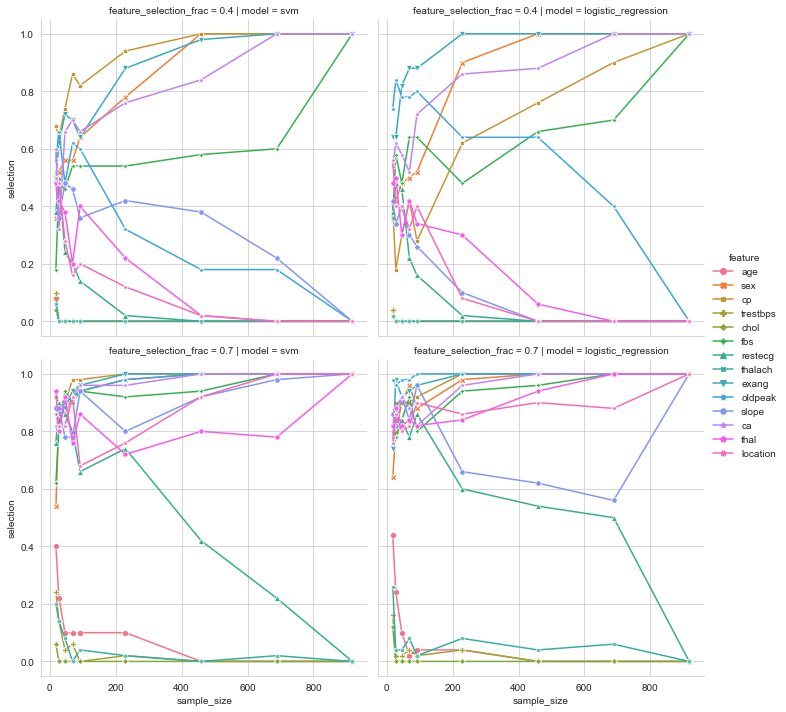

In [8]:
sns.relplot(x='sample_size', data=pivoted_binary, hue='feature', kind='line', y='selection', ci=95, row='feature_selection_frac', col='model', style='feature', markers=True, dashes=False)
plt.show()

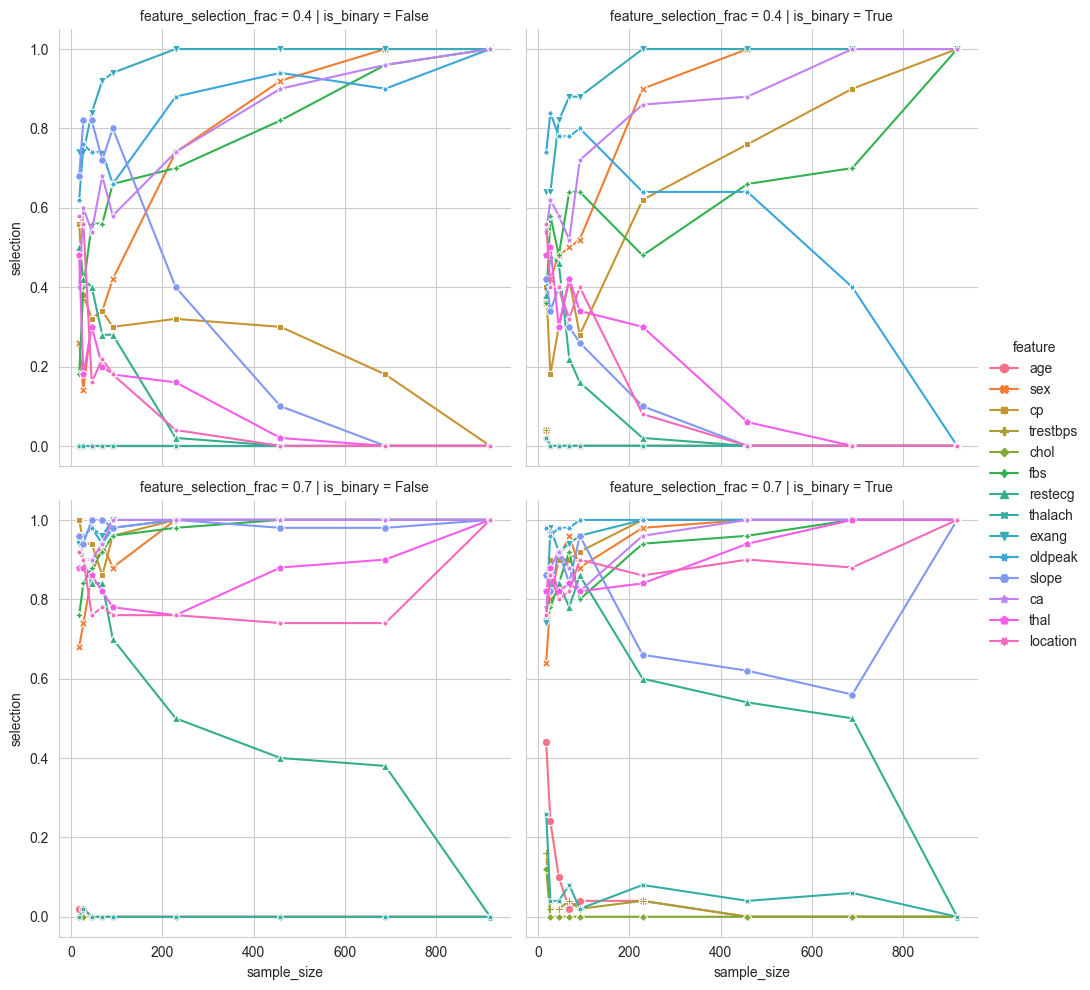

In [9]:
sns.relplot(x='sample_size', data=pivoted_lr, hue='feature', kind='line', y='selection', ci=95, row='feature_selection_frac', col='is_binary', style='feature', markers=True, dashes=False)
plt.show()

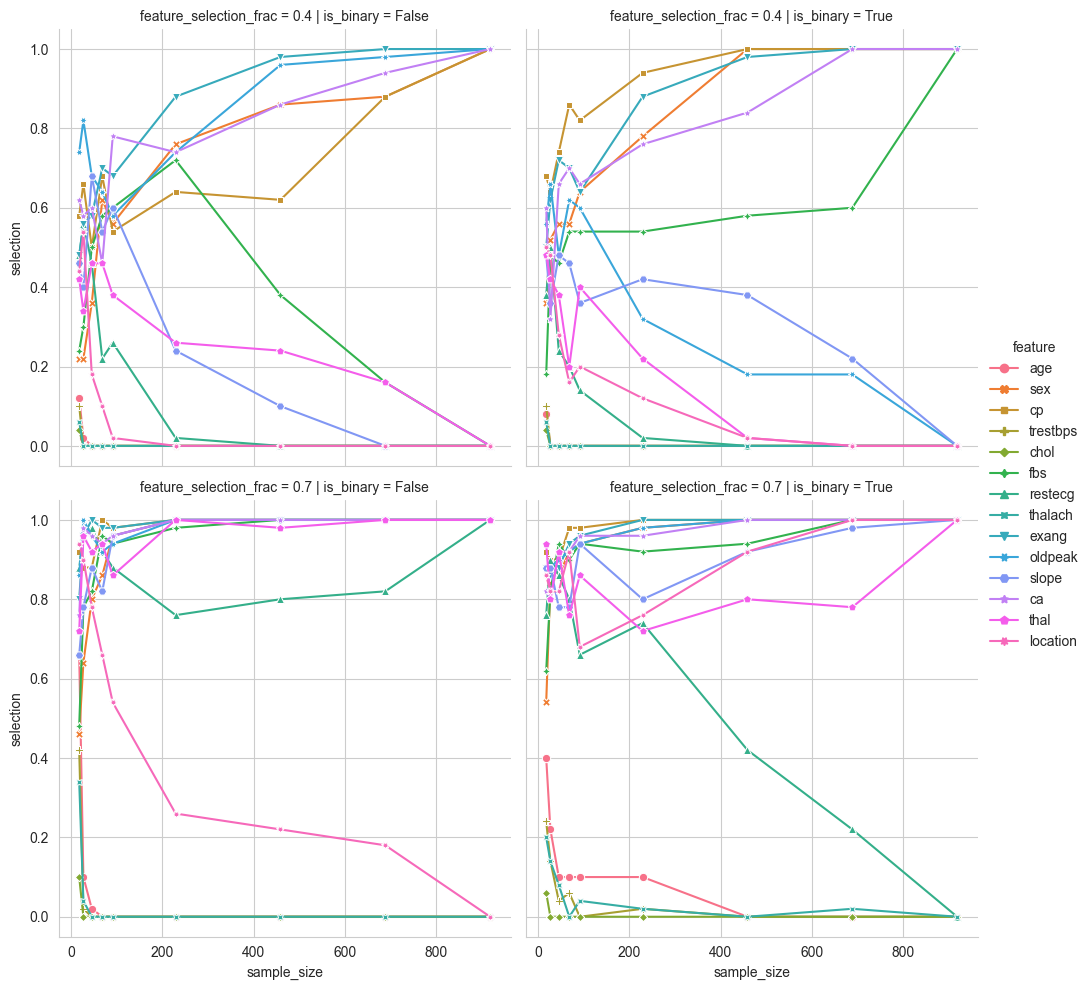

In [10]:
sns.relplot(x='sample_size', data=pivoted_svm, hue='feature', kind='line', y='selection', ci=95, row='feature_selection_frac', col='is_binary', style='feature', markers=True, dashes=False)
plt.show()

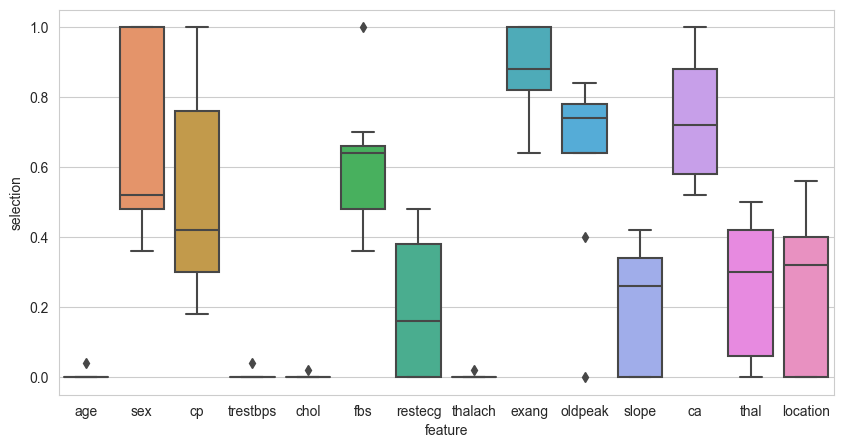

In [11]:
plt.figure(figsize=(10,5))
pivoted_lr_4_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.4) & (pivoted_lr['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_4_binary)
plt.show()

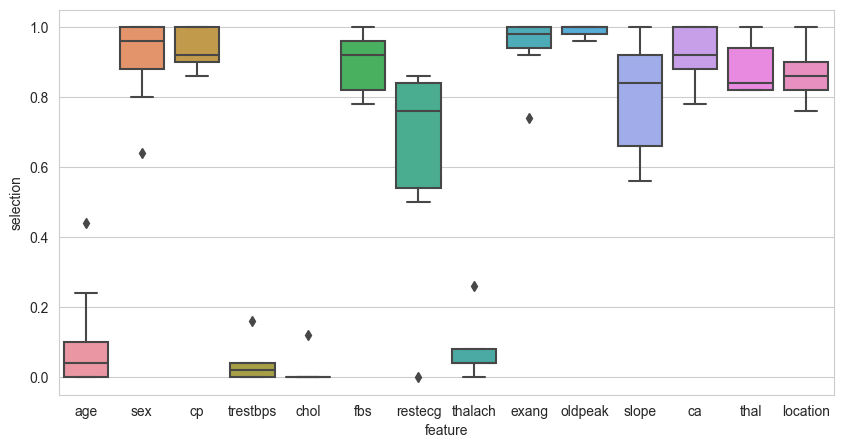

In [12]:
plt.figure(figsize=(10,5))
pivoted_lr_7_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.7) & (pivoted_lr['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_7_binary)
plt.show()

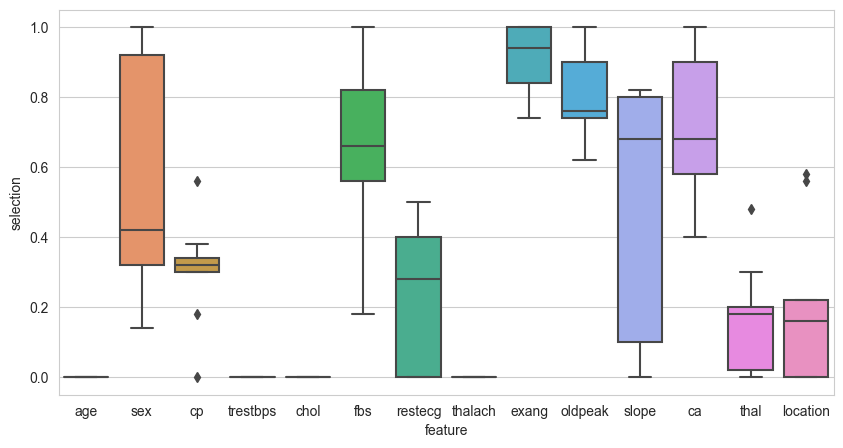

In [13]:
plt.figure(figsize=(10,5))
pivoted_lr_4_non_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.4) & (pivoted_lr['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_4_non_binary)
plt.show()

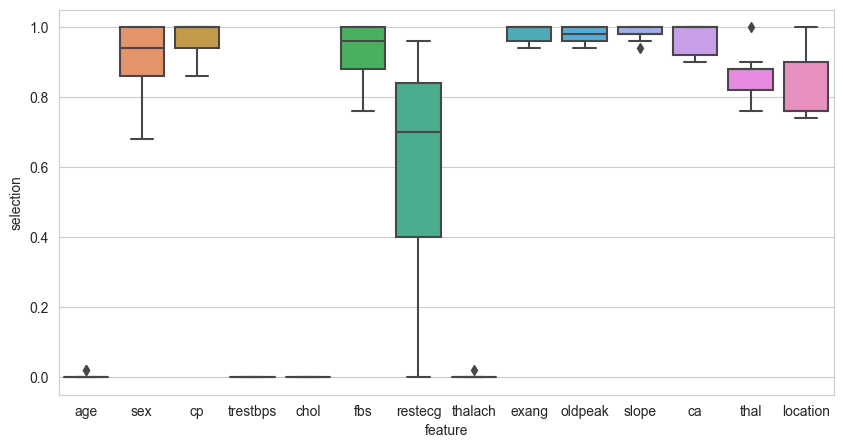

In [14]:
plt.figure(figsize=(10,5))
pivoted_lr_7_non_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.7) & (pivoted_lr['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_7_non_binary)
plt.show()

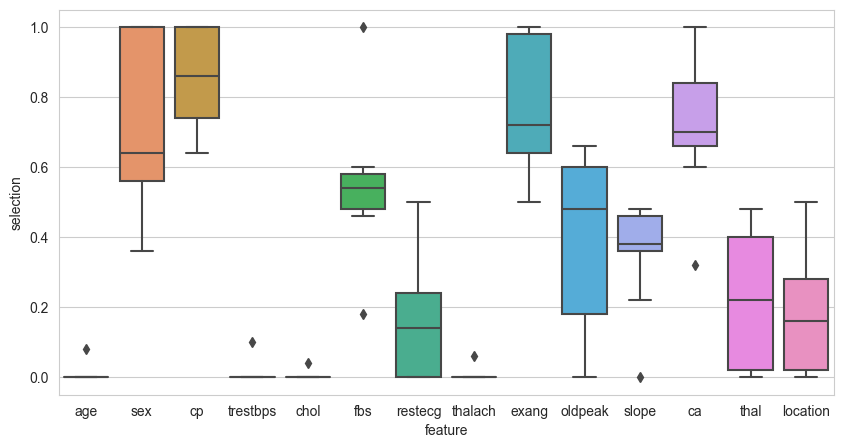

In [15]:
plt.figure(figsize=(10,5))
pivoted_svm_4_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.4) & (pivoted_svm['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_4_binary)
plt.show()

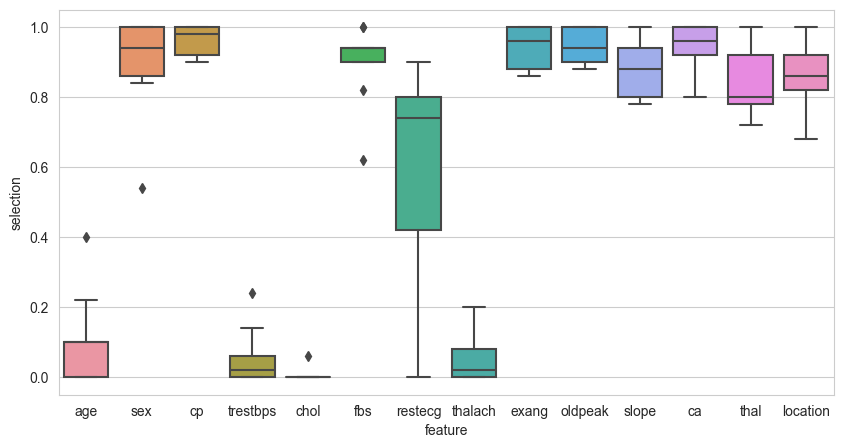

In [16]:
plt.figure(figsize=(10,5))
pivoted_svm_7_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.7) & (pivoted_svm['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_7_binary)
plt.show()

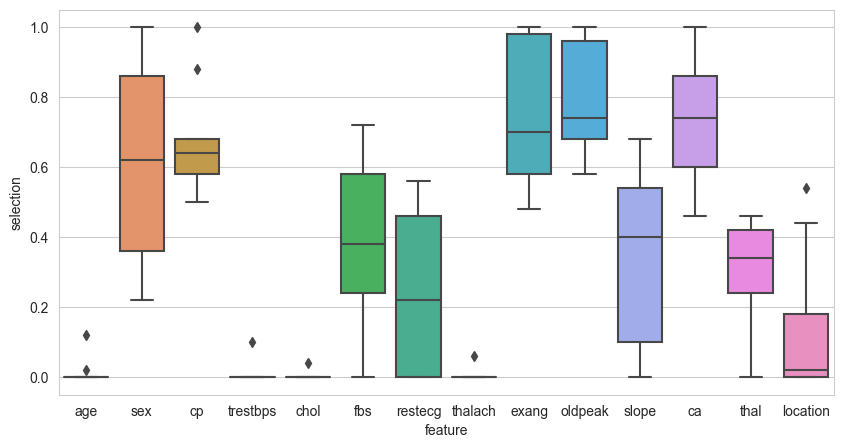

In [17]:
plt.figure(figsize=(10,5))
pivoted_svm_4_non_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.4) & (pivoted_svm['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_4_non_binary)
plt.show()

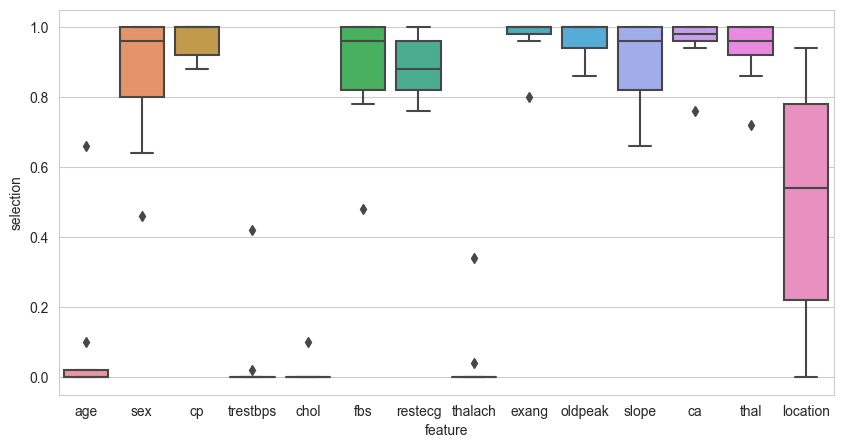

In [18]:
plt.figure(figsize=(10,5))
pivoted_svm_7_non_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.7) & (pivoted_svm['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_7_non_binary)
plt.show()